# Important Definitions

### Players

    Player 1
    Player 2

### Colors

    red = 0
    green = 1 
    yellow = 2 
    blue = 3
    purple = 4 
    black = 5

# Running Tests

In [ ]:
from MCTS import MCTS
from Board import Board
import numpy as np
from time import time
from multiprocessing import Process

In [ ]:
def test_AI_helper(size, AI_move_first, num_iterations, exploration_parameter, 
            intelligence_parameter, dumb_move_depth):
    # Initializing a random board of the given size
    board = Board(size=size)

    # Playing out the game
    while sum(board.get_score()) < size[0]*size[1]:
        if AI_move_first:
            MCTS_ = MCTS(board, 1, exploration_parameter = exploration_parameter, 
                         intelligence_parameter = intelligence_parameter)
            board.update_board(1, MCTS_.select_move(num_iterations = num_iterations))
            board.update_board(2, board.best_move_depth(2, dumb_move_depth))
        else:
            board.update_board(1, board.best_move_depth(1, dumb_move_depth))
            MCTS_ = MCTS(board, 2, exploration_parameter = exploration_parameter, 
                         intelligence_parameter = intelligence_parameter)
            board.update_board(2, MCTS_.select_move(num_iterations = num_iterations))
    
    return board.get_score()

In [ ]:
def test_AI(AI_mover, num_iters, exploration_parameter, intelligence, dumb_depth):
    num_games = 100
    scores = np.zeros((2, num_games))

    start_time = time()
    for i in range(num_games):
        score = test_AI_helper((7,8), AI_mover, num_iters, exploration_parameter, intelligence, dumb_depth)
        scores[0, i] = score[0]
        scores[1, i] = score[1]                        
    
    if AI_mover:
        print("-------------------------------------------------------------------------")  
        print(f"With the AI going first, {num_iters} number of iterations," + 
              f" and dumb_move_depth of {dumb_depth}")
        print(f"The total time was {time() - start_time} seconds.")
        
        win_percentage = sum(scores[0, :] > scores[1, :])
        loss_percentage = sum(scores[0, :] < scores[1, :])
        tie_percentage = sum(scores[0, :] == scores[1, :])
        avg_AI_score = np.mean(scores[0,:])
        avg_dumb_score = np.mean(scores[1,:])
        
        print(f"The AI win percentage was {win_percentage}%, the AI loss percentage was {loss_percentage}%" +
          f", and the tie percentage was {tie_percentage}%.")
        print(f"The AI average score was {avg_AI_score} and the dumb average score was {avg_dumb_score}")
    
    else:
        print("-------------------------------------------------------------------------") 
        print(f"With the AI going second, {num_iters} number of iterations," + 
              f" and dumb_move_depth of {dumb_depth}")
        print(f"The total time was {time() - start_time} seconds.")

        win_percentage = sum(scores[1, :] > scores[0, :])
        loss_percentage = sum(scores[1, :] < scores[0, :])
        tie_percentage = sum(scores[1, :] == scores[0, :])
        avg_AI_score = np.mean(scores[1,:])
        avg_dumb_score = np.mean(scores[0,:])
        
        print(f"The AI win percentage was {win_percentage}%, the AI loss percentage was {loss_percentage}%" +
          f", and the tie percentage was {tie_percentage}%.")
        print(f"The AI average score was {avg_AI_score} and the dumb average score was {avg_dumb_score}")

In [ ]:
# Testing a crazy number of Configurations
num_iterations = [50, 100, 500, 1000, 2000]
move_first = [True, False]
Exploration_Paramters = [5]
Intelligence_Parameters = [0.5]
dumb_move_depth = [1, 3]

jobs = []
for num_iters in num_iterations:
    for AI_mover in move_first:
        for exploration_parameter in Exploration_Paramters:
            for intelligence in Intelligence_Parameters:
                for dumb_depth in dumb_move_depth:
                    job = Process(target=test_AI, args=(AI_mover, num_iters, 
                                                             exploration_parameter, intelligence, dumb_depth))
                    jobs.append(job)
                    job.start()
                    
for job in jobs: 
    job.join()

Actually ran this code on a compute cluser with a 32 core CPU

# Actual Game Test

In [1]:
from MCTS import MCTS
from Board import Board
import numpy as np

In [59]:
# Data from an actual iMessage Filler game
data = np.array([[1,3,0,3,0,1,3,0],[3,4,3,2,4,3,1,2],[5,1,2,1,0,2,3,0],[1,5,1,4,3,4,1,4],
                [2,4,2,5,0,1,4,5],[5,1,3,0,2,5,0,2],[3,4,5,2,4,0,3,0]])

intelligence_parameter = 0.5
exploration_parameter = 5
num_terations = 1000

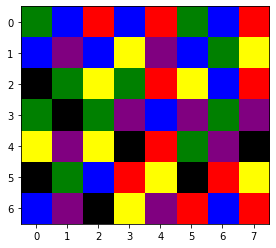

In [60]:
test = Board(data=data)
test.display_board()

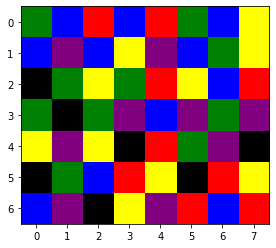

In [61]:
# Updating player 2 first becuase iMessage has the oppenent always
# in the upper right even if they go first
test.update_board(2,2)
test.display_board()

Note: The win percentage and average score in the early game are misleading because the AI is intentially trying a lot of paths that are not good moves. Thus the win percentage and average score for these very bad paths will be very low in the early game but will get better as the game progresses if the AI thinks it's getting a better chance of winning.

red has win percentage 0.18762088974854932 with an average score of 6.166344294003869
green has win percentage 0.19672131147540983 with an average score of 6.362477231329693
purple has win percentage 0.31547260686333534 with an average score of 10.418422636965682
black has win percentage 0.29052466718872355 with an average score of 9.668754894283472
Wall time: 6.5 s


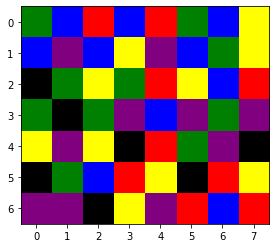

In [62]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

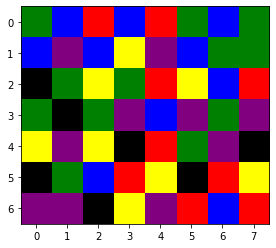

In [63]:
test.update_board(2,1)
test.display_board()

red has win percentage 0.15267175572519084 with an average score of 4.954198473282442
yellow has win percentage 0.1839323467230444 with an average score of 5.92600422832981
blue has win percentage 0.24279835390946503 with an average score of 7.9245541838134415
black has win percentage 0.3561643835616438 with an average score of 11.686591946865946
Wall time: 7.42 s


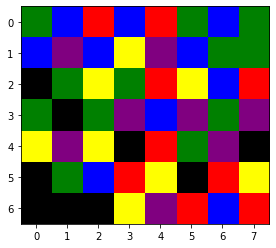

In [64]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

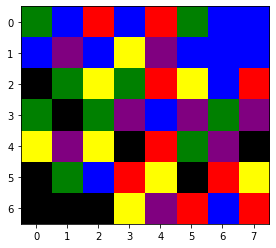

In [65]:
test.update_board(2,3)
test.display_board()

red has win percentage 0.11597374179431072 with an average score of 3.702407002188184
green has win percentage 0.16744186046511628 with an average score of 5.330232558139537
yellow has win percentage 0.29820359281437125 with an average score of 9.496606786427169
purple has win percentage 0.09319899244332494 with an average score of 3.0000000000000004
Wall time: 7.95 s


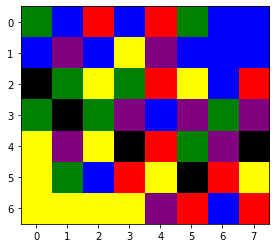

In [66]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

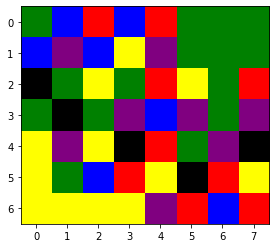

In [67]:
test.update_board(2,1)
test.display_board()

red has win percentage 0.17233560090702948 with an average score of 5.383219954648525
blue has win percentage 0.12759643916913946 with an average score of 3.991097922848663
purple has win percentage 0.36935655883398505 with an average score of 11.597582651973012
black has win percentage 0.162227602905569 with an average score of 5.055690072639227
Wall time: 7.8 s


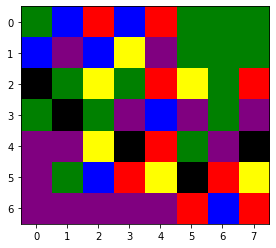

In [68]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

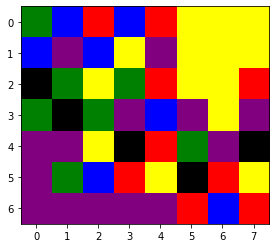

In [69]:
test.update_board(2,2)
test.display_board()

red has win percentage 0.4834897462634689 with an average score of 15.333333333333337
green has win percentage 0.25440806045340053 with an average score of 8.035264483627211
blue has win percentage 0.22822822822822822 with an average score of 7.171171171171173
black has win percentage 0.2594458438287154 with an average score of 8.005037783375315
Wall time: 6.66 s


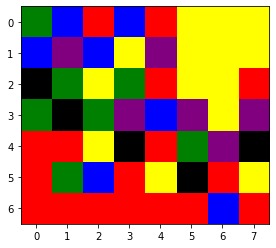

In [70]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

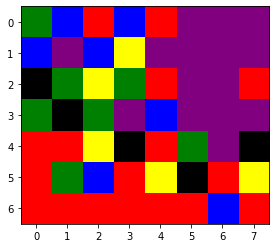

In [71]:
test.update_board(2,4)
test.display_board()

green has win percentage 0.215311004784689 with an average score of 6.425837320574161
yellow has win percentage 0.2048780487804878 with an average score of 6.2390243902439
blue has win percentage 0.21052631578947367 with an average score of 6.483253588516744
black has win percentage 0.5669920141969832 with an average score of 17.687962141378254
Wall time: 5.03 s


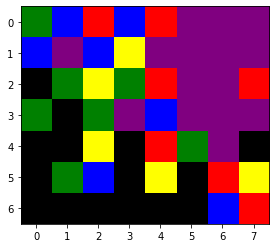

In [72]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

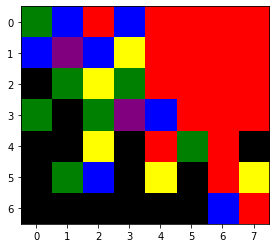

In [73]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.645072152287381 with an average score of 19.987411728584483
yellow has win percentage 0.16778523489932887 with an average score of 5.073825503355705
blue has win percentage 0.30855018587360594 with an average score of 9.52044609665428
purple has win percentage 0.3465045592705167 with an average score of 10.483282674772045
Wall time: 3.38 s


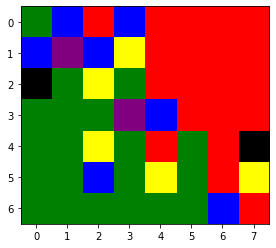

In [74]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

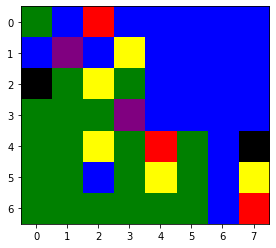

In [75]:
test.update_board(2,3)
test.display_board()

red has win percentage 0.35658914728682173 with an average score of 10.488372093023251
yellow has win percentage 0.3609022556390977 with an average score of 10.6766917293233
purple has win percentage 0.8713545925320251 with an average score of 25.740528754428162
black has win percentage 0.136986301369863 with an average score of 4.0
Wall time: 2.58 s


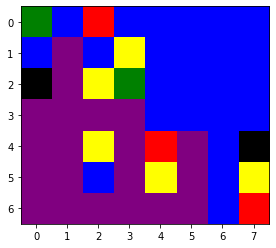

In [77]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

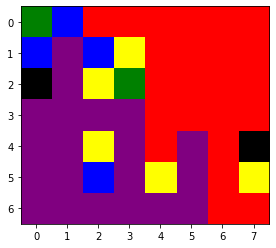

In [78]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.8016 with an average score of 23.3679999999999
yellow has win percentage 0.2597402597402597 with an average score of 7.623376623376624
blue has win percentage 0.9551500154655119 with an average score of 28.104546860500147
black has win percentage 0.21739130434782608 with an average score of 6.333333333333335
Wall time: 2.13 s


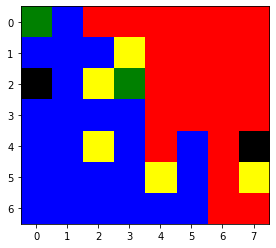

In [79]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

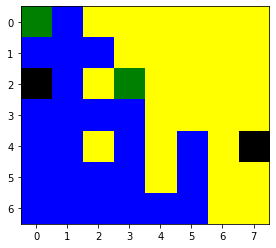

In [80]:
test.update_board(2,2)
test.display_board()

red has win percentage 0.273972602739726 with an average score of 7.945205479452056
green has win percentage 0.9997346776333245 with an average score of 28.992305651365232
purple has win percentage 0.32941176470588235 with an average score of 9.552941176470586
black has win percentage 0.2987012987012987 with an average score of 8.662337662337661
Wall time: 1.9 s


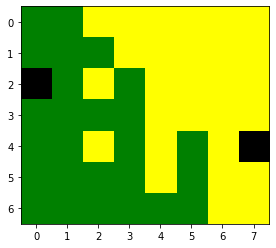

In [81]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

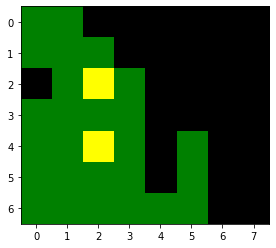

In [82]:
test.update_board(2,5)
test.display_board()

red has win percentage 0.999000999000999 with an average score of 28.97102897102955
yellow has win percentage 0.999000999000999 with an average score of 28.97102897102955
blue has win percentage 0.999000999000999 with an average score of 28.97102897102955
purple has win percentage 0.999000999000999 with an average score of 28.97102897102955
Wall time: 1.76 s


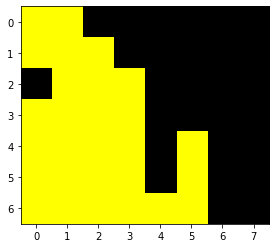

In [83]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

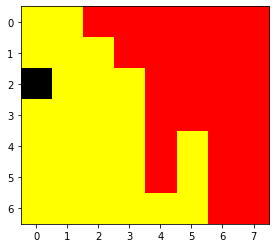

In [84]:
test.update_board(2,0)
test.display_board()

green has win percentage 0.999000999000999 with an average score of 28.97102897102955
blue has win percentage 0.999000999000999 with an average score of 28.97102897102955
purple has win percentage 0.999000999000999 with an average score of 28.97102897102955
black has win percentage 0.999000999000999 with an average score of 28.97102897102955
Wall time: 1.44 s


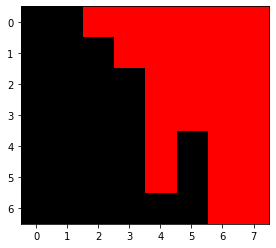

In [85]:
%%time
tester = MCTS(test, 1, exploration_parameter = exploration_parameter, intelligence_parameter = intelligence_parameter)
test.update_board(1, tester.select_move(num_iterations = num_terations, verbose = True))
test.display_board()

In [87]:
print(f"The final AI score was {test.get_score()[0]} and the final human player scores was {test.get_score()[1]}")

The final AI score was 29 and the final human player scores was 27
